<div style="display: flex; background-color: RGB(100,149,237);" >
<h1 style="margin: auto; padding: 30px; ">Mission 1 </h1>
</div>

<div style="display: flex; background-color: RGB(100,149,237);" >
<h3 style="margin: auto; padding: 30px; ">Imporation des librairies</h3>
</div>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<div style="display: flex; background-color: RGB(100,149,237);" >
<h3 style="margin: auto; padding: 30px; ">Imporation des données</h3>
</div>

In [3]:
customers = pd.read_csv("../data/olist_customers_dataset.csv")
geolocation = pd.read_csv("../data/olist_geolocation_dataset.csv")
items = pd.read_csv("../data/olist_order_items_dataset.csv")
payments = pd.read_csv("../data/olist_order_payments_dataset.csv")
reviews = pd.read_csv("../data/olist_order_reviews_dataset.csv")
orders = pd.read_csv("../data/olist_orders_dataset.csv")
products = pd.read_csv("../data/olist_products_dataset.csv")
sellers = pd.read_csv("../data/olist_sellers_dataset.csv")
translate = pd.read_csv("../data/product_category_name_translation.csv")

<div style="display: flex; background-color: RGB(100,149,237);" >
<h3 style="margin: auto; padding: 30px; "> Traduction des produits </h3>
</div>

In [4]:
translate.head()

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

In [5]:
translate_mapper = dict(zip(translate.product_category_name, translate.product_category_name_english))

In [6]:
products['product_category_name'] = products.product_category_name.map(translate_mapper)

In [7]:
products.product_category_name.head()

0         perfumery
1               art
2    sports_leisure
3              baby
4        housewares
Name: product_category_name, dtype: object

<div style="display: flex; background-color: RGB(100,149,237);" >
<h3 style="margin: auto; padding: 30px; ">Création de la Dataframe initiale</h3>
</div>

In [8]:
df = pd.merge(customers, orders, on = "customer_id", how = "inner")
df = pd.merge(pd.merge(df, items, on = "order_id", how='inner'), products, on = "product_id", how="inner")
df.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  8912fc0c3bbf1e2fbf35819e21706718  9eae34bbd3a474ec5d07949ca7de67c0   
2  8912fc0c3bbf1e2fbf35819e21706718  9eae34bbd3a474ec5d07949ca7de67c0   
3  f0ac8e5a239118859b1734e1087cbb1f  3c799d181c34d51f6d44bbbc563024db   
4  6bc8d08963a135220ed6c6d098831f84  23397e992b09769faf5e66f9e171a241   

   customer_zip_code_prefix    customer_city customer_state  \
0                     14409           franca             SP   
1                     68030         santarem             PA   
2                     68030         santarem             PA   
3                     92480  nova santa rita             RS   
4                     25931             mage             RJ   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
1  c1d2b34febe9cd269e378117d6681172    delivered      2017-11-09 00:50:13   
2  c1d2b34febe9cd269e378117d6681172    delivered      2017-11-09 00:50:13   
3  b1a5d5365d330d10485e0203d54ab9e8    delivered      2017-05-07 20:11:26   
4  2e604b3614664aa66867856dba7e61b7    delivered      2018-02-03 19:45:40   

     order_approved_at order_delivered_carrier_date  ...   price  \
0  2017-05-16 15:22:12          2017-05-23 10:47:57  ...  124.99   
1  2017-11-10 00:47:48          2017-11-22 01:43:37  ...  112.99   
2  2017-11-10 00:47:48          2017-11-22 01:43:37  ...  112.99   
3  2017-05-08 22:22:56          2017-05-19 20:16:31  ...  124.99   
4  2018-02-04 22:29:19          2018-02-19 18:21:47  ...  106.99   

  freight_value  product_category_name product_name_lenght  \
0         21.88       office_furniture                41.0   
1         24.90       office_furniture                41.0   
2         24.90       office_furniture                41.0   
3         15.62       office_furniture                41.0   
4         30.59       office_furniture                41.0   

  product_description_lenght product_photos_qty  product_weight_g  \
0                     1141.0                1.0            8683.0   
1                     1141.0                1.0            8683.0   
2                     1141.0                1.0            8683.0   
3                     1141.0                1.0            8683.0   
4                     1141.0                1.0            8683.0   

   product_length_cm product_height_cm  product_width_cm  
0               54.0              64.0              31.0  
1               54.0              64.0              31.0  
2               54.0              64.0              31.0  
3               54.0              64.0              31.0  
4               54.0              64.0              31.0  

[5 rows x 26 columns]

<div style="display: flex; background-color: RGB(100,149,237);" >
<h3 style="margin: auto; padding: 30px; ">Recency</h3>
</div>

**Nous allons créer une colonne qui va nous permettre de savoir combien de jour s'est écouler entre la dernière commande d'un client par rapport à la dernière commande du dernier client.**

In [9]:
date_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for col in date_columns:
    df[col] = pd.to_datetime(df[col], format='%Y-%m-%d %H:%M:%S')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    112650 non-null  object        
 1   customer_unique_id             112650 non-null  object        
 2   customer_zip_code_prefix       112650 non-null  int64         
 3   customer_city                  112650 non-null  object        
 4   customer_state                 112650 non-null  object        
 5   order_id                       112650 non-null  object        
 6   order_status                   112650 non-null  object        
 7   order_purchase_timestamp       112650 non-null  datetime64[ns]
 8   order_approved_at              112635 non-null  datetime64[ns]
 9   order_delivered_carrier_date   111456 non-null  datetime64[ns]
 10  order_delivered_customer_date  110196 non-null  datetime64[ns]
 11  

In [11]:
df.describe(include="all")

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_7604\1985922364.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include="all")
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_7604\1985922364.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include="all")
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_7604\1985922364.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future

customer_id                customer_unique_id  \
count                             112650                            112650   
unique                             98666                             95420   
top     fc3d1daec319d62d49bfb5e1f83123e9  c8460e4251689ba205045f3ea17884a1   
freq                                  21                                24   
first                                NaN                               NaN   
last                                 NaN                               NaN   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_code_prefix customer_city customer_state  \
count              112650.000000        112650         112650   
unique                       NaN          4110             27   
top                          NaN     sao paulo             SP   
freq                         NaN         17808          47449   
first                        NaN           NaN            NaN   
last                         NaN           NaN            NaN   
mean                35119.309090           NaN            NaN   
std                 29866.120801           NaN            NaN   
min                  1003.000000           NaN            NaN   
25%                 11310.000000           NaN            NaN   
50%                 24340.000000           NaN            NaN   
75%                 59028.750000           NaN            NaN   
max                 99990.000000           NaN            NaN   

                                order_id order_status  \
count                             112650       112650   
unique                             98666            7   
top     8272b63d03f5f79c56e9e4120aec44ef    delivered   
freq                                  21       110197   
first                                NaN          NaN   
last                                 NaN          NaN   
mean                                 NaN          NaN   
std                                  NaN          NaN   
min                                  NaN          NaN   
25%                                  NaN          NaN   
50%                                  NaN          NaN   
75%                                  NaN          NaN   
max                                  NaN          NaN   

       order_purchase_timestamp    order_approved_at  \
count                    112650               112635   
unique                    98112                90174   
top         2017-07-16 18:19:25  2018-02-24 03:20:27   
freq                         21                   23   
first       2016-09-04 21:15:19  2016-09-15 12:16:38   
last        2018-09-03 09:06:57  2018-09-03 17:40:06   
mean                        NaN                  NaN   
std                         NaN                  NaN   
min                         NaN                  NaN   
25%                         NaN                  NaN   
50%                         NaN                  NaN   
75%                         NaN                  NaN   
max                         NaN                  NaN   

       order_delivered_carrier_date  ...          price  freight_value  \
count                        111456  ...  112650.000000  112650.000000   
unique                        81017  ...            NaN            NaN   
top             2018-05-09 15:48:00  ...            NaN            NaN   
freq                             48  ...            NaN            NaN   
first           2016-10-08 10:34:01  ...            NaN            NaN 

In [12]:
df_max_purchase = df.groupby('customer_unique_id').order_purchase_timestamp.max().reset_index()
df_max_purchase.columns = ['customer_unique_id', 'MaxPurchaseDate']

df_max_purchase.head()

customer_unique_id     MaxPurchaseDate
0  0000366f3b9a7992bf8c76cfdf3221e2 2018-05-10 10:56:27
1  0000b849f77a49e4a4ce2b2a4ca5be3f 2018-05-07 11:11:27
2  0000f46a3911fa3c0805444483337064 2017-03-10 21:05:03
3  0000f6ccb0745a6a4b88665a16c9f078 2017-10-12 20:29:41
4  0004aac84e0df4da2b147fca70cf8255 2017-11-14 19:45:42

In [13]:
df_max_purchase['Recency'] = (df_max_purchase['MaxPurchaseDate'].max() - df_max_purchase['MaxPurchaseDate']).dt.days

In [14]:
df_max_purchase

customer_unique_id     MaxPurchaseDate  Recency
0      0000366f3b9a7992bf8c76cfdf3221e2 2018-05-10 10:56:27      115
1      0000b849f77a49e4a4ce2b2a4ca5be3f 2018-05-07 11:11:27      118
2      0000f46a3911fa3c0805444483337064 2017-03-10 21:05:03      541
3      0000f6ccb0745a6a4b88665a16c9f078 2017-10-12 20:29:41      325
4      0004aac84e0df4da2b147fca70cf8255 2017-11-14 19:45:42      292
...                                 ...                 ...      ...
95415  fffcf5a5ff07b0908bd4e2dbc735a684 2017-06-08 21:00:36      451
95416  fffea47cd6d3cc0a88bd621562a9d061 2017-12-10 20:07:56      266
95417  ffff371b4d645b6ecea244b27531430a 2017-02-07 15:49:16      572
95418  ffff5962728ec6157033ef9805bacc48 2018-05-02 15:17:41      123
95419  ffffd2657e2aad2907e67c3e9daecbeb 2017-05-02 20:18:45      488

[95420 rows x 3 columns]

In [15]:
df_max_purchase['Recency'].describe()

count    95420.000000
mean       242.600377
std        153.160320
min          0.000000
25%        118.000000
50%        223.000000
75%        352.000000
max        728.000000
Name: Recency, dtype: float64

Sur nos 95420 clients différents : 

    -En moyenne leurs dernières commandes était il y a 243 jour
    -Au plus tard il y a 728 jours
    -Et la médianne se trouve à 223 jours

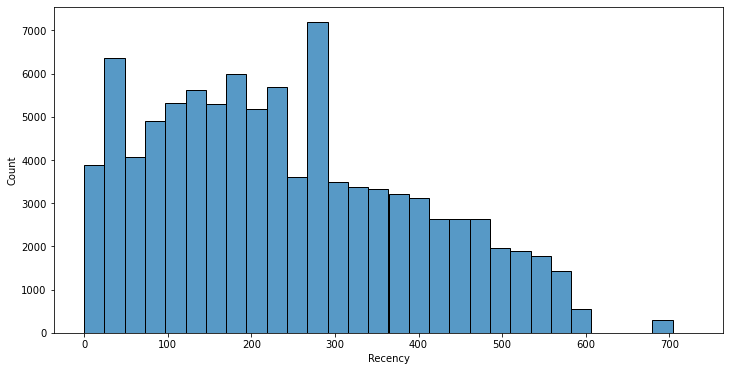

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(df_max_purchase['Recency'], bins=30)
plt.show()

<div style="display: flex; background-color: RGB(100,149,237);" >
<h3 style="margin: auto; padding: 30px; ">Frequence </h3>
</div>

**Nous calculons la fréquence de commande d'un client.**

In [17]:
df_frequency = df.groupby('customer_unique_id').order_purchase_timestamp.count().reset_index()
df_frequency.columns = ['customer_unique_id','order_purchase_timestamp']

df_frequency.describe()

order_purchase_timestamp
count               95420.00000
mean                    1.18057
std                     0.62145
min                     1.00000
25%                     1.00000
50%                     1.00000
75%                     1.00000
max                    24.00000

**il y a au total 95420 clients.</br>
la moyennes est de 1.18.</br>
écart-type est de 0.6214.</br>
la mediane nous montre que les clients ne commande qu'une seule fois.</br>
75 pourcent des clients ne commande que 1 seule fois.</br>
et au maximum il y a 24 commandes du meme client.</br>**

<div style="display: flex; background-color: RGB(100,149,237);" >
<h3 style="margin: auto; padding: 30px; ">Nombre de produit et type de produit</h3>
</div>

**Nous allons maintenant voir le nombre de produit et le type de produit que commande un client.**

In [18]:
df

customer_id                customer_unique_id  \
0       06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1       8912fc0c3bbf1e2fbf35819e21706718  9eae34bbd3a474ec5d07949ca7de67c0   
2       8912fc0c3bbf1e2fbf35819e21706718  9eae34bbd3a474ec5d07949ca7de67c0   
3       f0ac8e5a239118859b1734e1087cbb1f  3c799d181c34d51f6d44bbbc563024db   
4       6bc8d08963a135220ed6c6d098831f84  23397e992b09769faf5e66f9e171a241   
...                                  ...                               ...   
112645  f6c6d3e1e20969a5eed982163f959719  fb354969e06f2093c0083cbfbb91864e   
112646  da37711b17efd5f2539e8196ab215f04  5f2971f9805e3ccb030226e30c8e8390   
112647  184e0c2cfc746789643521df0e9ff904  c64ede6d0ae8901b1b6fb03528c1b7e6   
112648  821a7275a08f32975caceff2e08ea262  046470763123d3d6364f89095b4e47ab   
112649  1ed0c832c2dd99570a59260e71768bdf  82d46759af0369aad49084bacf85a6c3   

        customer_zip_code_prefix        customer_city customer_state  \
0                          14409               franca             SP   
1                          68030             santarem             PA   
2                          68030             santarem             PA   
3                          92480      nova santa rita             RS   
4                          25931                 mage             RJ   
...                          ...                  ...            ...   
112645                      1521            sao paulo             SP   
112646                      4313            sao paulo             SP   
112647                     68660  sao miguel do guama             PA   
112648                      5734            sao paulo             SP   
112649                     37610          bom repouso             MG   

                                order_id order_status  \
0       00e7ee1b050b8499577073aeb2a297a1    delivered   
1       c1d2b34febe9cd269e378117d6681172    delivered   
2       c1d2b34febe9cd269e378117d6681172    delivered   
3       b1a5d5365d330d10485e0203d54ab9e8    delivered   
4       2e604b3614664aa66867856dba7e61b7    delivered   
...                                  ...          ...   
112645  b2f58affcc178fea2daaf834f1acff5e    delivered   
112646  c8203bb57639618630affac9e8e923dd    delivered   
112647  45b3000bcd10464ac178f32cd783fc83    delivered   
112648  49645a8902c1ba980836b7bff991d69f    delivered   
112649  51c6d2f460589fa7b65f2da51e860206    delivered   

       order_purchase_timestamp   order_approved_at  \
0           2017-05-16 15:05:35 2017-05-16 15:22:12   
1           2017-11-09 00:50:13 2017-11-10 00:47:48   
2           2017-11-09 00:50:13 2017-11-10 00:47:48   
3           2017-05-07 20:11:26 2017-05-08 22:22:56   
4           2018-02-03 19:45:40 2018-02-04 22:29:19   
...                         ...                 ...   
112645      2018-07-14 14:08:11 2018-07-17 04:31:33   
112646      2017-03-27 23:04:18 2017-03-27 23:23:38   
112647      2017-12-07 23:55:46 2017-12-09 23:50:32   
112648      2018-04-04 17:50:52 2018-04-04 18:08:41   
112649      2017-11-14 12:04:09 2017-11-14 12:15:25   

       order_delivered_carrier_date  ...   price freight_value  \
0               2017-05-23 10:47:57  ...  124.99         21.88   
1               2017-11-22 01:43:37  ...  112.99         24.90   
2               2017-11-22 01:43:37  ...  112.99         24.90   
3               2017-05-19 20:16:31  ...  124.99         15.62   
4               2018-02-19 18:21:47  ...  106.99         30.59   
...                             ...  ...     ...           ...   
112645          2018-07-25 11:18:00  ...   99.90         21.14   
112646          2017-03-28 14:18:59  ...   19.99         10.96   
112647          2017-12-11 20:29:02  ...  250.00         54.11   
112648          2018-04-05 16:36:49  ...   84.90          7.46   
112649          2017-11-27 20:44:47  ...  167.99         31.93   

           product_category_name product_name_lenght  \
0               office_furniture

<div style="display: flex; background-color: RGB(100,149,237);" >
<h3 style="margin: auto; padding: 30px; ">Panier Moyen </h3>
</div>

**Panier moyen par client**

In [19]:
df.order_id.value_counts()

8272b63d03f5f79c56e9e4120aec44ef    21
ab14fdcfbe524636d65ee38360e22ce8    20
1b15974a0141d54e36626dca3fdc731a    20
9ef13efd6949e4573a18964dd1bbe7f5    15
428a2f660dc84138d969ccd69a0ab6d5    15
                                    ..
582ecddc80251f58adb996143e81d6e0     1
db5a3eab52ef5c18c745c172a5050809     1
96c3a40e38272781dd5b3dfc4797e8f7     1
9761d4d539165b2fedae19fe7d0f8cc8     1
51c6d2f460589fa7b65f2da51e860206     1
Name: order_id, Length: 98666, dtype: int64

In [20]:
df.order_id.value_counts().mean()

1.1417306873695092

In [21]:
df.order_id.value_counts().describe()

count    98666.000000
mean         1.141731
std          0.538452
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         21.000000
Name: order_id, dtype: float64

In [22]:
df_panier = df.groupby("customer_unique_id")['price'].sum().reset_index()

df_panier

customer_unique_id    price
0      0000366f3b9a7992bf8c76cfdf3221e2   129.90
1      0000b849f77a49e4a4ce2b2a4ca5be3f    18.90
2      0000f46a3911fa3c0805444483337064    69.00
3      0000f6ccb0745a6a4b88665a16c9f078    25.99
4      0004aac84e0df4da2b147fca70cf8255   180.00
...                                 ...      ...
95415  fffcf5a5ff07b0908bd4e2dbc735a684  1570.00
95416  fffea47cd6d3cc0a88bd621562a9d061    64.89
95417  ffff371b4d645b6ecea244b27531430a    89.90
95418  ffff5962728ec6157033ef9805bacc48   115.00
95419  ffffd2657e2aad2907e67c3e9daecbeb    56.99

[95420 rows x 2 columns]

In [23]:
df_panier.describe()

price
count  95420.000000
mean     142.440198
std      217.656355
min        0.850000
25%       47.900000
50%       89.900000
75%      155.000000
max    13440.000000

**il y a au total 98666 clients.</br>
la moyennes est de 125.91 Dollars </br>
écart-type est de 190.98.</br>
la mediane nous montre que les clients depense 79 Dollars.</br>
75 pourcent des clients depense 139 Dollars.</br>
et au maximum il un client a dépensé 6735 Dollars.</br>**

<div style="display: flex; background-color: RGB(100,149,237);" >
<h3 style="margin: auto; padding: 30px; ">Canal d'achat </h3>
</div>

In [24]:
df["nombre_vente"] = 0
df_category = df.groupby("product_category_name")['nombre_vente'].count().reset_index()

In [25]:
df_category

product_category_name  nombre_vente
0   agro_industry_and_commerce           212
1             air_conditioning           297
2                          art           209
3        arts_and_craftmanship            24
4                        audio           364
..                         ...           ...
66                  stationery          2517
67      tablets_printing_image            83
68                   telephony          4545
69                        toys          4117
70               watches_gifts          5991

[71 rows x 2 columns]

In [26]:
df_provisoire = df[["product_photos_qty","product_category_name"]]

In [27]:
df_category = pd.merge(df_category, df_provisoire, on="product_category_name", how="inner")

In [28]:
df_category.drop_duplicates(inplace=True)
df_category

product_category_name  nombre_vente  product_photos_qty
0       agro_industry_and_commerce           212                 2.0
22      agro_industry_and_commerce           212                 1.0
23      agro_industry_and_commerce           212                 3.0
33      agro_industry_and_commerce           212                 6.0
36      agro_industry_and_commerce           212                 8.0
...                            ...           ...                 ...
106843               watches_gifts          5991                 6.0
107303               watches_gifts          5991                 7.0
108397               watches_gifts          5991                 8.0
108682               watches_gifts          5991                 9.0
110308               watches_gifts          5991                10.0

[529 rows x 3 columns]

In [29]:
df_category = df_category.groupby("product_category_name").median()

In [30]:
df_category.sort_values("nombre_vente")

nombre_vente  product_photos_qty
product_category_name                                      
security_and_services               2.0                 2.5
fashion_childrens_clothes           8.0                 3.5
la_cuisine                         14.0                 1.5
cds_dvds_musicals                  14.0                 2.0
arts_and_craftmanship              24.0                 3.5
...                                 ...                 ...
computers_accessories            7827.0                 5.0
furniture_decor                  8334.0                 6.5
sports_leisure                   8641.0                 6.0
health_beauty                    9670.0                 5.5
bed_bath_table                  11115.0                 5.0

[71 rows x 2 columns]

<div style="display: flex; background-color: RGB(100,149,237);" >
<h3 style="margin: auto; padding: 30px; ">Nombre de produit</h3>
</div>

**Nous allons voir le nombre de produit et le type de produit que commande un client**

In [31]:
df["number_product"] = 0
df_product = df.groupby(["customer_unique_id"]).number_product.count().reset_index()

In [32]:
df_product.sort_values("number_product", ascending=False).head()

customer_unique_id  number_product
74752  c8460e4251689ba205045f3ea17884a1              24
25885  4546caea018ad8c692964e3382debd19              21
73155  c402f431464c72e27330a67f7b94d4fb              20
39443  698e1cf81d01a3d389d96145f7fa6df8              20
5741   0f5ac8d5c31de21d2f25e24be15bbffb              18

<div style="display: flex; background-color: RGB(100,149,237);" >
<h1 style="margin: auto; padding: 30px; ">Mission 2 </h1>
</div>

<div style="display: flex; background-color: RGB(100,149,237);" >
<h3 style="margin: auto; padding: 30px; ">Imporation des librairies</h3>
</div>

In [33]:
%env OMP_NUM_THREADS=1
import numpy as np
from sklearn.datasets import load_iris
from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

env: OMP_NUM_THREADS=1


<div style="display: flex; background-color: RGB(100,149,237);" >
<h2 style="margin: auto; padding: 30px; ">Recency</h2>
</div>

<div style="display: flex; background-color: RGB(100,149,237);" >
<h3 style="margin: auto; padding: 30px; ">K-means</h3>
</div>

Text(0, 0.5, 'Cout du modele (Inertia)')

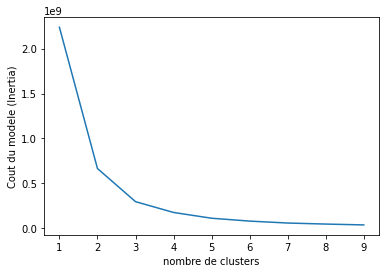

In [34]:
X = df_max_purchase[["Recency"]]
inertia = []
K_range = range(1, 10)
for k in K_range:
    model = KMeans(n_clusters=k, max_iter=1000).fit(X)
    inertia.append(model.inertia_)
plt.plot(K_range, inertia)
plt.xlabel("nombre de clusters")
plt.ylabel("Cout du modele (Inertia)")

In [35]:
model = KMeans(n_clusters=5)
model.fit(X)
model.predict(X)
X["Groupe"] = model.labels_
X

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_7604\3274706310.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Groupe"] = model.labels_


Recency  Groupe
0          115       1
1          118       1
2          541       3
3          325       2
4          292       2
...        ...     ...
95415      451       0
95416      266       2
95417      572       3
95418      123       1
95419      488       3

[95420 rows x 2 columns]

In [36]:
type_client = model.predict(X[["Recency"]])
np.sort(type_client)
x = type_client
unique, counts = np.unique(x, return_counts=True)
x_count = np.asarray((unique, counts)).T
print(
    "Le cluster 0 contient {} clients,\n le cluster 1 contient {} clients,\n et le cluster 2 contient {} clients,\n et le cluster 3 contient {} clients,\n et le cluster 4 contient {} clients".format(
        x_count[0][1], x_count[1][1], x_count[2][1], x_count[3][1], x_count[4][1]
    )
)

Le cluster 0 contient 15683 clients,
 le cluster 1 contient 25014 clients,
 et le cluster 2 contient 23047 clients,
 et le cluster 3 contient 11737 clients,
 et le cluster 4 contient 19939 clients


In [37]:
min = X.groupby("Groupe").min()

max = X.groupby("Groupe").max()

df_recency = min.assign(max = max)
df_recency.rename(columns = {"Recency":"min"}, inplace = True)
df_recency

min  max
Groupe          
0       326  451
1       104  210
2       211  325
3       452  728
4         0  103

**Donc on peut voir que l'on a 3 groupes de clients au niveau du Recency.**

In [38]:
matrice = np.asarray((df_recency))
print("Pour le cluster 0 les clients on commander pour la dernière fois entre {} et {} jour.\nPour le cluster 1 les clients on commander pour la dernière fois entre {} et {} jours.\nPour le cluster 2 les clients on commander pour la dernière fois entre {} et {} jours.\nPour le cluster 3 les clients on commander pour la dernière fois entre {} et {} jours.\nPour le cluster 4 les clients on commander pour la dernière fois entre {} et {} jours ".format(
    matrice[0][0], matrice[0][1], matrice[1][0], matrice[1][1], matrice[2][0], matrice[2][1], matrice[1][1], matrice[3][0], matrice[3][1], matrice[1][1], matrice[4][0], matrice[4][1])
     )

Pour le cluster 0 les clients on commander pour la dernière fois entre 326 et 451 jour.
Pour le cluster 1 les clients on commander pour la dernière fois entre 104 et 210 jours.
Pour le cluster 2 les clients on commander pour la dernière fois entre 211 et 325 jours.
Pour le cluster 3 les clients on commander pour la dernière fois entre 210 et 452 jours.
Pour le cluster 4 les clients on commander pour la dernière fois entre 728 et 210 jours 


<div style="display: flex; background-color: RGB(100,149,237);" >
<h3 style="margin: auto; padding: 30px; ">CAH (classification ascendante hiérarchique)</h3>
</div>

In [39]:
import plotly.figure_factory as ff
from sklearn.cluster import AgglomerativeClustering

#On va faire ca sur un echantillon moitié moins grand car mon pc va exploser sinon

echantillon = df_max_purchase[["Recency"]].iloc[0:100]

fig = ff.create_dendrogram(echantillon)
fig.update_layout(width=800, height=500)
fig.show()

Il est souvent pertinent de choisir le partitionnement correspondant au plus grand saut entre deux clusters consécutifs. C'est pour cela que nous allons donc choisir 5 clusters comme nombre de clusters optimal.

In [40]:
echantillon = df_max_purchase[["Recency"]].iloc[0:500]

fig = ff.create_dendrogram(echantillon)
fig.update_layout(width=800, height=500)
fig.show()

On va devoir selectionner les 20000 premieres iteration afin de se donner un ordre d'idée des groupes car je n'ai pas suffisament de RAM pour lancer sur la totalité.

In [41]:
Recency = df_max_purchase[["Recency"]].iloc[0:20000]
y_pred = AgglomerativeClustering(n_clusters=5).fit_predict(Recency)

In [42]:
Recency["groupe"] = y_pred

In [43]:
min = Recency.groupby("groupe").min()

max = Recency.groupby("groupe").max()

Recency = min.assign(max = max)
Recency.rename(columns = {"Recency":"min"}, inplace = True)
Recency

min  max
groupe          
0       217  377
1       378  506
2         4  148
3       149  216
4       507  700

In [44]:
matrice = np.asarray((Recency))
print("Pour le cluster 0 les clients on commander pour la dernière fois entre {} et {} jour.\nPour le cluster 1 les clients on commander pour la dernière fois entre {} et {} jours.\nPour le cluster 2 les clients on commander pour la dernière fois entre {} et {} jours.\nPour le cluster 3 les clients on commander pour la dernière fois entre {} et {} jours.\nPour le cluster 4 les clients on commander pour la dernière fois entre {} et {} jours ".format(
    matrice[0][0], matrice[0][1], matrice[1][0], matrice[1][1], matrice[2][0], matrice[2][1], matrice[1][1], matrice[3][0], matrice[3][1], matrice[1][1], matrice[4][0], matrice[4][1])
     )

Pour le cluster 0 les clients on commander pour la dernière fois entre 217 et 377 jour.
Pour le cluster 1 les clients on commander pour la dernière fois entre 378 et 506 jours.
Pour le cluster 2 les clients on commander pour la dernière fois entre 4 et 148 jours.
Pour le cluster 3 les clients on commander pour la dernière fois entre 506 et 149 jours.
Pour le cluster 4 les clients on commander pour la dernière fois entre 216 et 506 jours 


Nous avons des résultats similaire au k-means mais comme nous avons dû selectionner un echantillon nous n'avons pas des résultats aussi représentatives que pour les k-means où nous avons pû utiliser toute la population

<div style="display: flex; background-color: RGB(100,149,237);" >
<h2 style="margin: auto; padding: 30px; ">Frequence K-means</h2>
</div>

Text(0, 0.5, 'Cout du modele (Inertia)')

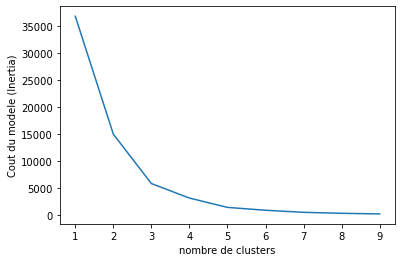

In [45]:
X = df_frequency[["order_purchase_timestamp"]]
inertia = []
K_range = range(1, 10)
for k in K_range:
    model = KMeans(n_clusters=k, max_iter=1000).fit(X)
    inertia.append(model.inertia_)
plt.plot(K_range, inertia)
plt.xlabel("nombre de clusters")
plt.ylabel("Cout du modele (Inertia)")


In [46]:
model = KMeans(n_clusters=5)
model.fit(X)
model.predict(X)
X["Groupe"] = model.labels_
X

order_purchase_timestamp  Groupe
0                             1       0
1                             1       0
2                             1       0
3                             1       0
4                             1       0
...                         ...     ...
95415                         2       2
95416                         1       0
95417                         1       0
95418                         1       0
95419                         1       0

[95420 rows x 2 columns]

In [47]:
type_client = model.predict(X[["order_purchase_timestamp"]])
np.sort(type_client)
x = type_client
unique, counts = np.unique(x, return_counts=True)
x_count = np.asarray((unique, counts)).T
print(
    "Le cluster 0 contient {} clients, le cluster 1 contient {} clients et le cluster 2 contient {} clients et le cluster 3 contient {} clients et le cluster 4 contient {} clients".format(
    x_count[0][1], x_count[1][1], x_count[2][1], x_count[3][1], x_count[4][1]
    )
)


Le cluster 0 contient 83551 clients, le cluster 1 contient 2304 clients et le cluster 2 contient 8996 clients et le cluster 3 contient 514 clients et le cluster 4 contient 55 clients


In [48]:
min = X.groupby("Groupe").min()

max = X.groupby("Groupe").max()

frequency = min.assign(max = max)
frequency.rename(columns = {"order_purchase_timestamp":"min"}, inplace = True)
frequency


min  max
Groupe          
0         1    1
1         3    4
2         2    2
3         5    8
4         9   24

In [49]:
matrice = np.asarray((df_frequency))
print("Pour le cluster 0 les clients on commander pour la dernière fois entre {} et {} jours.\nPour le cluster 1 les clients on commander pour la dernière fois entre {} et {} jours.\nPour le cluster 2 les clients on commander pour la dernière fois entre {} et {} jours.\nPour le cluster 3 les clients on commander pour la dernière fois entre {} et {} jours.\nPour le cluster 4 les clients on commander pour la dernière fois entre {} et {} jours. ".format(
    matrice[0][0], matrice[0][1], matrice[1][0], matrice[1][1], matrice[2][0], matrice[2][1], matrice[3][0], matrice[3][1], matrice[4][0], matrice[4][1])
     )

Pour le cluster 0 les clients on commander pour la dernière fois entre 0000366f3b9a7992bf8c76cfdf3221e2 et 1 jours.
Pour le cluster 1 les clients on commander pour la dernière fois entre 0000b849f77a49e4a4ce2b2a4ca5be3f et 1 jours.
Pour le cluster 2 les clients on commander pour la dernière fois entre 0000f46a3911fa3c0805444483337064 et 1 jours.
Pour le cluster 3 les clients on commander pour la dernière fois entre 0000f6ccb0745a6a4b88665a16c9f078 et 1 jours.
Pour le cluster 4 les clients on commander pour la dernière fois entre 0004aac84e0df4da2b147fca70cf8255 et 1 jours. 


<div style="display: flex; background-color: RGB(100,149,237);" >
<h2 style="margin: auto; padding: 30px; ">Panier Moyen K-means</h2>
</div>

Text(0, 0.5, 'Cout du modele (Inertia)')

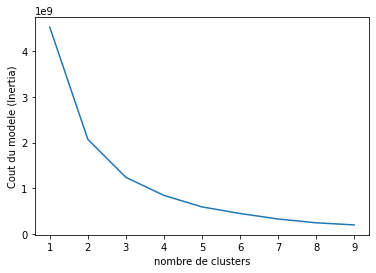

In [50]:
X = df_panier[["price"]]
inertia = []
K_range = range(1, 10)
for k in K_range:
    model = KMeans(n_clusters=k, max_iter=1000).fit(X)
    inertia.append(model.inertia_)
plt.plot(K_range, inertia)
plt.xlabel("nombre de clusters")
plt.ylabel("Cout du modele (Inertia)")

In [51]:
model = KMeans(n_clusters=5)
model.fit(X)
model.predict(X)
X["Groupe"] = model.labels_
X

price  Groupe
0       129.90       0
1        18.90       0
2        69.00       0
3        25.99       0
4       180.00       3
...        ...     ...
95415  1570.00       1
95416    64.89       0
95417    89.90       0
95418   115.00       0
95419    56.99       0

[95420 rows x 2 columns]

In [52]:
type_client = model.predict(X[["price"]])
np.sort(type_client)
x = type_client
unique, counts = np.unique(x, return_counts=True)
x_count = np.asarray((unique, counts)).T
print(
    "Le cluster 0 contient {} clients, le cluster 1 contient {} clients et le cluster 2 contient {} clients et le cluster 3 contient {} clients et le cluster 4 contient {} clients".format(
        x_count[0][1], x_count[1][1], x_count[2][1], x_count[3][1], x_count[4][1]
    )
)

Le cluster 0 contient 69239 clients, le cluster 1 contient 812 clients et le cluster 2 contient 3710 clients et le cluster 3 contient 21585 clients et le cluster 4 contient 74 clients


In [53]:
min = X.groupby("Groupe").min()

max = X.groupby("Groupe").max()

panier = min.assign(max = max)
panier.rename(columns = {"price":"min"}, inplace = True)
panier

min       max
Groupe                   
0          0.85    148.91
1       1078.00   2550.00
2        438.90   1074.38
3        148.93    438.09
4       2589.00  13440.00

In [54]:
matrice = np.asarray((df_panier))
print("Pour le cluster 0 les clients on commander pour un montant entre {} et {} dollars.\nPour le cluster 1 les clients on commander pour un montant entre {} et {} dollars.\nPour le cluster 2 les clients on commander pour un montant entre {} et {} dollars \nPour le cluster 3 les clients on commander pour un montant entre {} et {} dollars \nPour le cluster 4 les clients on commander pour un montant entre {} et {} dollars. ".format(
    matrice[0][0], matrice[0][1], matrice[1][0], matrice[1][1], matrice[2][0], matrice[2][1], matrice[3][0], matrice[3][1], matrice[4][0], matrice[4][1])
     )

Pour le cluster 0 les clients on commander pour un montant entre 0000366f3b9a7992bf8c76cfdf3221e2 et 129.9 dollars.
Pour le cluster 1 les clients on commander pour un montant entre 0000b849f77a49e4a4ce2b2a4ca5be3f et 18.9 dollars.
Pour le cluster 2 les clients on commander pour un montant entre 0000f46a3911fa3c0805444483337064 et 69.0 dollars 
Pour le cluster 3 les clients on commander pour un montant entre 0000f6ccb0745a6a4b88665a16c9f078 et 25.99 dollars 
Pour le cluster 4 les clients on commander pour un montant entre 0004aac84e0df4da2b147fca70cf8255 et 180.0 dollars. 


<div style="display: flex; background-color: RGB(100,149,237);" >
<h2 style="margin: auto; padding: 30px; ">Application sur RFM</h2>
</div>

<div style="display: flex; background-color: RGB(100,149,237);" >
<h3 style="margin: auto; padding: 30px; ">Kmeans</h3>
</div>

In [55]:
df_rfm = pd.merge(df_max_purchase, df_frequency, on = "customer_unique_id", how = "inner")
df_rfm = pd.merge(df_rfm, df_panier, on = "customer_unique_id", how = "inner")
df_rfm = df_rfm.drop("MaxPurchaseDate", axis = 1)
df_rfm.rename(columns={"order_purchase_timestamp":"Frequence", "price":"Montant"}, inplace = True)
df_rfm.head()

customer_unique_id  Recency  Frequence  Montant
0  0000366f3b9a7992bf8c76cfdf3221e2      115          1   129.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f      118          1    18.90
2  0000f46a3911fa3c0805444483337064      541          1    69.00
3  0000f6ccb0745a6a4b88665a16c9f078      325          1    25.99
4  0004aac84e0df4da2b147fca70cf8255      292          1   180.00

Text(0, 0.5, 'Cout du modele (Inertia)')

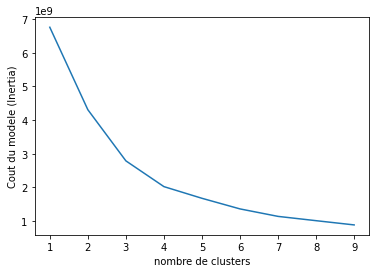

In [56]:
X = df_rfm[["Recency", "Frequence", "Montant"]]
inertia = []
K_range = range(1, 10)
for k in K_range:
    model = KMeans(n_clusters=k, max_iter=1000).fit(X)
    inertia.append(model.inertia_)
plt.plot(K_range, inertia)
plt.xlabel("nombre de clusters")
plt.ylabel("Cout du modele (Inertia)")

In [57]:
model = KMeans(n_clusters=5)
model.fit(X)
model.predict(X)
X["Groupe"] = model.labels_
X

Recency  Frequence  Montant  Groupe
0          115          1   129.90       2
1          118          1    18.90       2
2          541          1    69.00       3
3          325          1    25.99       4
4          292          1   180.00       4
...        ...        ...      ...     ...
95415      451          2  1570.00       1
95416      266          1    64.89       4
95417      572          1    89.90       3
95418      123          1   115.00       2
95419      488          1    56.99       3

[95420 rows x 4 columns]

In [58]:
count = X.groupby("Groupe").count()

min = X.groupby("Groupe").min()

max = X.groupby("Groupe").max()

mean = X.groupby("Groupe").mean()

In [59]:
X.Recency.mean(), X.Frequence.mean(), X.Montant.mean()

(242.60037727939635, 1.1805701110878222, 142.44019807180558)

In [60]:
count, min , max, mean.round(2)

(        Recency  Frequence  Montant
 Groupe                             
 0          5707       5707     5707
 1           756        756      756
 2         34168      34168    34168
 3         21218      21218    21218
 4         33571      33571    33571,
         Recency  Frequence  Montant
 Groupe                             
 0             4          1   332.80
 1             8          1  1180.00
 2             0          1     0.85
 3           355          1     3.85
 4           173          1     2.29,
         Recency  Frequence   Montant
 Groupe                              
 0           698         16   1175.80
 1           697         24  13440.00
 2           181         12    379.99
 3           728         21    499.99
 4           363         12    340.00,
         Recency  Frequence  Montant
 Groupe                             
 0        234.84       1.55   572.70
 1        247.92       1.61  1784.55
 2         90.77       1.16   102.69
 3        463.19       1.15 

Les caractère que l'on peut identifier sur nos différents groupe sont :

   - **Groupe 0** : Beaucoup de client, qui dépense moins que la moyenne (ceux qui dépense le moins), ont une fréquence    dans la moyenne, des clients dans la moyenne en terme de récence 
   - **Groupe 1** : Très peu de client, qui dépense énormement, sont ceux qui ont la fréquence la plus élevée, et une récence moyenne
   - **Groupe 2** : Beaucoup de clients, les plus récents, une fréquence dans la moyenne, un montant faible
   - **Groupe 3** : Beaucoup de clients, les moins récents, une fréquence moyenne, un montant faible
   - **Groupe 4** : Peu de clients, une récence moyenne, une fréquence forte, un montant élevé

**En résumé :**

| Groupe | Recence | Frequence | Count | Montant |
|--------|---------|-- --------|-------|---------|
| 0 | ~ | ~ | + | - |
| 1 | ~ | + | -- | ++ |
| 2 | + | ~ | + | - |
| 3 | - | ~ | + | - |
| 4 | ~ | + | - | + |

*~ = moyen*

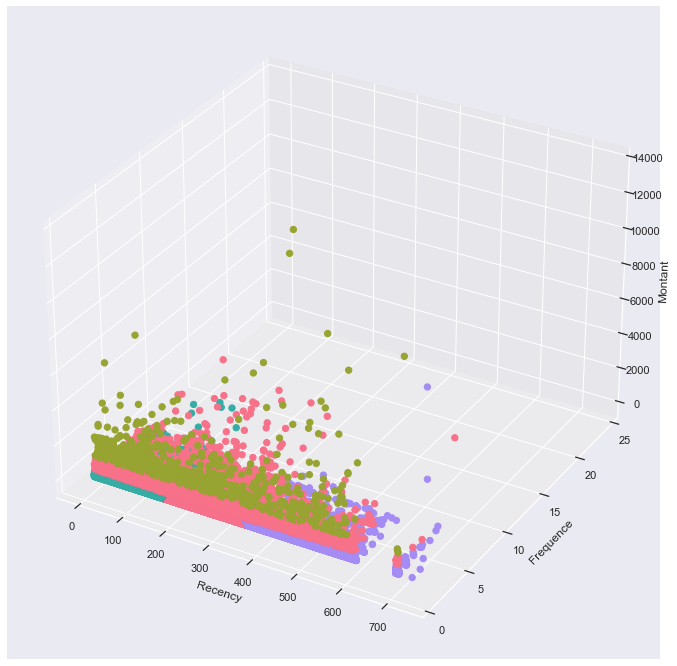

In [61]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

sns.set(style = "darkgrid")

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection = '3d')

cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

ax.scatter(xs = X.Recency, ys = X.Frequence, zs = X.Montant, s=40, c=X.Groupe, marker='o', cmap=cmap, alpha=1)

ax.set_xlabel("Recency")
ax.set_ylabel("Frequence")
ax.set_zlabel("Montant")

plt.show()

<div style="display: flex; background-color: RGB(100,149,237);" >
<h3 style="margin: auto; padding: 30px; ">CAH</h3>
</div>

In [62]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance

In [63]:
cah_rfm = df_rfm[["Recency", "Frequence", "Montant"]].iloc[0:500]

fig = ff.create_dendrogram(cah_rfm)
fig.update_layout(width=800, height=500)
fig.show()

On peut voir grâce à ce dendrogramme que l'on peut choisir 4 ou 5 clusters

In [64]:
rfm = df_rfm[["Recency", "Frequence", "Montant"]].iloc[0:20000]
y_pred = AgglomerativeClustering(n_clusters=4).fit_predict(rfm)

In [65]:
rfm["groupe"] = y_pred

In [66]:
rfm

Recency  Frequence  Montant  groupe
0          115          1   129.90       2
1          118          1    18.90       2
2          541          1    69.00       3
3          325          1    25.99       2
4          292          1   180.00       2
...        ...        ...      ...     ...
19995      264          1   169.99       2
19996      182          1    27.90       2
19997      219          3    82.88       2
19998      299          1   149.90       2
19999      434          1    52.00       3

[20000 rows x 4 columns]

In [67]:
count = rfm.groupby("groupe").count()

min = rfm.groupby("groupe").min()

max = rfm.groupby("groupe").max()

mean = rfm.groupby("groupe").mean()

In [68]:
count, mean, min, max, rfm.mean()

(        Recency  Frequence  Montant
 groupe                             
 0           173        173      173
 1          1493       1493     1493
 2         14197      14197    14197
 3          4137       4137     4137,
            Recency  Frequence      Montant
 groupe                                    
 0       251.497110   1.601156  1747.934740
 1       242.832552   1.507703   498.420308
 2       177.428541   1.144185    93.002738
 3       468.842156   1.158811   116.989531,
         Recency  Frequence  Montant
 groupe                             
 0            16          1  1050.61
 1             8          1   223.99
 2             4          1     2.20
 3           303          1     5.90,
         Recency  Frequence   Montant
 groupe                              
 0           584         18  13440.00
 1           697         15   1099.00
 2           413         12    379.99
 3           700          6    550.99,
 Recency      243.230550
 Frequence      1.178300
 Montant  

**En résumé :**

| Groupe | Recence | Frequence | Count | Montant |
|--------|---------|-- --------|-------|---------|
| 0 | -- | ~ | + | ++ |
| 1 | - | ~ | + | + |
| 2 | ++ | + | ~ | - |
| 3 | ~ | - | ~ | ~ |

*~ = moyen*

Nous tombons sur des résultats similaires à celles des k-means mais qui demande plus de puissance et qui de ce fait nous obtenons des résultats bien moins précis

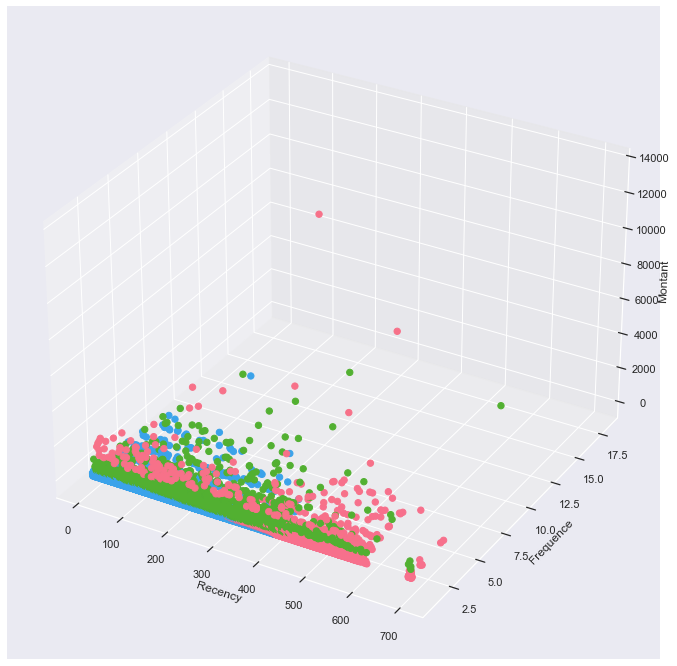

In [69]:
sns.set(style = "darkgrid")

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection = '3d')

cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

ax.scatter(xs = rfm.Recency, ys = rfm.Frequence, zs = rfm.Montant, s=40, c=rfm.groupe, marker='o', cmap=cmap, alpha=1)

ax.set_xlabel("Recency")
ax.set_ylabel("Frequence")
ax.set_zlabel("Montant")

plt.show()

<div style="display: flex; background-color: RGB(100,149,237);" >
<h3 style="margin: auto; padding: 30px; ">DBSCAN</h3>
</div>

[[0.         0.        ]
 [0.         0.91      ]
 [0.         1.        ]
 ...
 [0.         3.01337021]
 [0.         0.9       ]
 [0.         0.9       ]]
20000


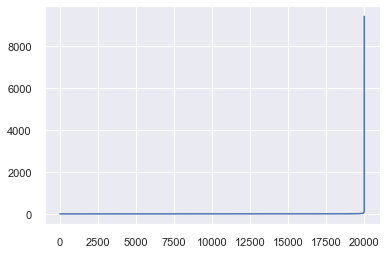

In [70]:
%matplotlib inline
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(rfm)
distances, indices = nbrs.kneighbors(rfm)
print(distances)
distances = np.sort(distances, axis=0)
print(len(distances))
distances = distances[0:50000,1]
plt.plot(distances);

In [71]:
distances

array([   0.        ,    0.        ,    0.        , ...,  303.34478337,
        438.11868266, 9440.30415826])

In [72]:
from sklearn.cluster import DBSCAN

y_pred = DBSCAN(eps = 0.025, min_samples=5).fit_predict(X)
plt.scatter(X['abscisse'],X['ordonnée'],c = y_pred);

KeyError: 'abscisse'

In [73]:
rfm = df_rfm[["Recency", "Frequence", "Montant"]]
y_pred = DBSCAN(eps = 2, min_samples=5).fit_predict(rfm)

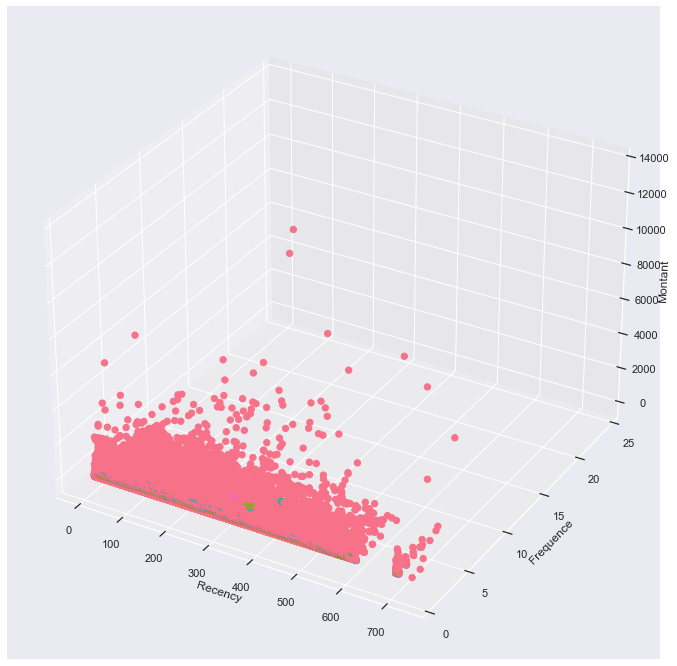

In [74]:
sns.set(style = "darkgrid")

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection = '3d')

cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

ax.scatter(xs = rfm.Recency, ys = rfm.Frequence, zs = rfm.Montant, s=40, c=y_pred, marker='o', cmap=cmap, alpha=1)

ax.set_xlabel("Recency")
ax.set_ylabel("Frequence")
ax.set_zlabel("Montant")

plt.show()

In [75]:
rfm["groupe"] = y_pred 

In [76]:
rfm

Recency  Frequence  Montant  groupe
0          115          1   129.90       0
1          118          1    18.90       0
2          541          1    69.00       1
3          325          1    25.99       0
4          292          1   180.00       2
...        ...        ...      ...     ...
95415      451          2  1570.00      -1
95416      266          1    64.89       0
95417      572          1    89.90      55
95418      123          1   115.00       0
95419      488          1    56.99       0

[95420 rows x 4 columns]

In [77]:
rfm.groupby(["groupe"]).count()

Recency  Frequence  Montant
groupe                             
-1        16459      16459    16459
 0        60561      60561    60561
 1          217        217      217
 2          177        177      177
 3            5          5        5
...         ...        ...      ...
 960          5          5        5
 961          5          5        5
 962          5          5        5
 963          4          4        4
 964          5          5        5

[966 rows x 3 columns]

<div style="display: flex; background-color: RGB(100,149,237);" >
<h2 style="margin: auto; padding: 30px; ">Optics</h2>
</div>

Recency  Frequence  Montant  groupe
0          115          1   129.90       0
1          118          1    18.90       0
2          541          1    69.00       1
3          325          1    25.99       0
4          292          1   180.00       2
...        ...        ...      ...     ...
95415      451          2  1570.00      -1
95416      266          1    64.89       0
95417      572          1    89.90      55
95418      123          1   115.00       0
95419      488          1    56.99       0

[95420 rows x 4 columns]

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import unique
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import OPTICS
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
#                                 
import os
model_op = OPTICS(eps=0.8, min_samples=10)
#
yhat_op = model_op.fit_predict(rfm)
clusters_op = unique(yhat_op)
print("Clusters of Mean Shift.",clusters_op)
labels_op = model_op.labels_

Clusters of Mean Shift. [  -1    0    1 ... 2373 2374 2375]


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\cluster\_optics.py:903: RuntimeWarning:

divide by zero encountered in true_divide



In [80]:
score_op = metrics.silhouette_score(rfm,labels_op)

print("Score of Mean Shift = ", score_op)

Score of Mean Shift =  -0.22311386429416377


In [81]:
km = KMeans(n_clusters=5) #K-Means model
cluster_km = km.fit_predict(rfm) #f

In [82]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn.mixture import GaussianMixture as GMM
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

from sklearn.metrics import adjusted_rand_score,calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score,completeness_score,homogeneity_score,v_measure_score
from nltk.stem import WordNetLemmatizer

from IPython.core.interactiveshell import InteractiveShell
from IPython.core.display import display, HTML
pd.options.display.max_rows = 500
InteractiveShell.ast_node_interactivity = "all"
warnings.filterwarnings("ignore")


gmm = GMM(n_components=2, covariance_type='full', max_iter=100, n_init=10)
cluster_gmm = gmm.fit_predict(rfm)

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_7604\1160990977.py:21: DeprecationWarning:

Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display



In [83]:
from sklearn.cluster import OPTICS
optics = OPTICS(min_samples=2)
cluster_optics = optics.fit_predict(rfm)

In [85]:
#installer kmodes avc pip install kmodes dans le prompt anaconda
from kmodes.kmodes import KModes
km1 = KModes(n_clusters=5,init='Cao')
cluster_km1 = km1.fit_predict(rfm)
models = [km,km1,gmm,optics]
clst = [cluster_km,cluster_km1,cluster_gmm,cluster_optics]

Text(0.5, 0.98, 'TSNE Visualisation for different cluster models')

Text(0.5, 1.0, 'KMeans(n_clusters=5)')

Text(0.5, 1.0, 'KModes(n_clusters=5, n_init=1)')

Text(0.5, 1.0, 'GaussianMixture(n_components=2, n_init=10)')

Text(0.5, 1.0, 'OPTICS(min_samples=2)')

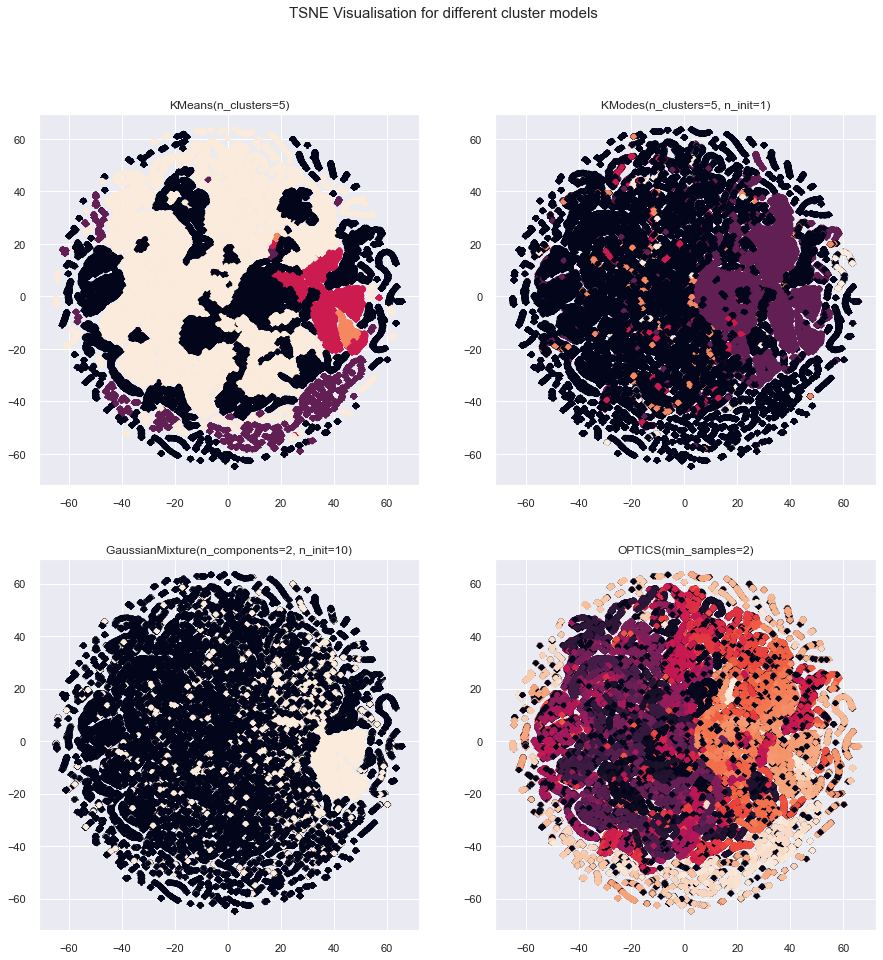

In [86]:
tsne = TSNE(n_components = 2)
tsne_out = tsne.fit_transform(rfm)
fig, axs = plt.subplots(2,2, figsize=(15, 15))
plt.suptitle('TSNE Visualisation for different cluster models',fontsize=15)
for i in range(4):
    p = axs[i//2][i%2].scatter(tsne_out[:, 0], tsne_out[:, 1],marker=10,s=10,linewidths=5,c=clst[i])
    axs[i//2][i%2].set_title(models[i])

<div style="display: flex; background-color: RGB(100,149,237);" >
<h3 style="margin: auto; padding: 30px; ">PCA</h3>
</div>

In [87]:
rfm_pca = df_rfm.drop(["customer_unique_id"], axis = 1)

### 1-Centrer-réduir

In [88]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(rfm_pca)

rfm_pca = scaler.transform(rfm_pca) 

rfm_pca

StandardScaler()

array([[-0.83312079, -0.2905643 , -0.05761497],
       [-0.81353336, -0.2905643 , -0.56759586],
       [ 1.94829305, -0.2905643 , -0.33741529],
       ...,
       [ 2.1506964 , -0.2905643 , -0.24139187],
       [-0.78088766, -0.2905643 , -0.12607186],
       [ 1.60224861, -0.2905643 , -0.39259431]])

### 2-Réaliser la PCA

In [89]:
from sklearn.decomposition import PCA

mypca = PCA(n_components=3) 

mypca.fit(rfm_pca)

print(mypca.singular_values_) 

print(mypca.explained_variance_ratio_) 

print(mypca.components_)  

data_sortie= mypca.fit_transform(rfm_pca)

print(mypca.noise_variance_)

PCA(n_components=3)

[336.86088077 308.91691961 278.12781916]
[0.39640625 0.33336709 0.27022666]
[[-0.03890511  0.70719428  0.70594804]
 [ 0.9982187  -0.00447279  0.05949296]
 [-0.04523064 -0.70700512  0.70576055]]
0.0


### 3-Verification

<BarContainer object of 3 artists>

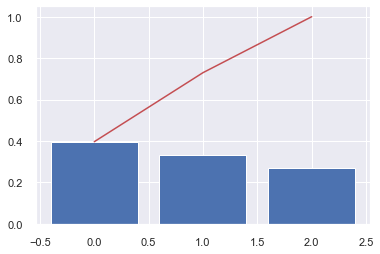

In [90]:
import numpy as np

y = list(mypca.explained_variance_ratio_)

x = range(len(y))

ycum = np.cumsum(y)

plt.bar(x,y)

plt.plot(x,ycum,"-r")

plt.show()

<div style="display: flex; background-color: RGB(100,149,237);" >
<h5 style="margin: auto; padding: 30px; ">PCA K-means CAH et DBscan</h5>
</div>

### K-means :

Text(0.5, 0, 'nombre de clusters')

Text(0, 0.5, 'Cout du modele (Inertia)')

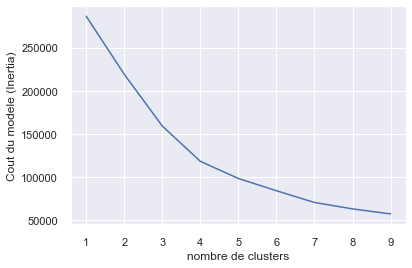

In [91]:
k_mean = rfm_pca
inertia = []
K_range = range(1, 10)
for k in K_range:
    model = KMeans(n_clusters=k, max_iter=1000).fit(k_mean)
    inertia.append(model.inertia_)
plt.plot(K_range, inertia)
plt.xlabel("nombre de clusters")
plt.ylabel("Cout du modele (Inertia)")

In [92]:
model = KMeans(n_clusters=5)
model.fit(k_mean)

KMeans(n_clusters=5)

In [93]:
test = pd.concat([df_rfm,pd.DataFrame(k_mean)], axis = 1)
test.columns.values[-3: ] = ['Component 1', "Component 2", "Component 3"]
test["groupe"] = model.labels_

In [94]:
test

customer_unique_id  Recency  Frequence  Montant  \
0      0000366f3b9a7992bf8c76cfdf3221e2      115          1   129.90   
1      0000b849f77a49e4a4ce2b2a4ca5be3f      118          1    18.90   
2      0000f46a3911fa3c0805444483337064      541          1    69.00   
3      0000f6ccb0745a6a4b88665a16c9f078      325          1    25.99   
4      0004aac84e0df4da2b147fca70cf8255      292          1   180.00   
...                                 ...      ...        ...      ...   
95415  fffcf5a5ff07b0908bd4e2dbc735a684      451          2  1570.00   
95416  fffea47cd6d3cc0a88bd621562a9d061      266          1    64.89   
95417  ffff371b4d645b6ecea244b27531430a      572          1    89.90   
95418  ffff5962728ec6157033ef9805bacc48      123          1   115.00   
95419  ffffd2657e2aad2907e67c3e9daecbeb      488          1    56.99   

       Component 1  Component 2  Component 3  groupe  
0        -0.833121    -0.290564    -0.057615       1  
1        -0.813533    -0.290564    -0.567596       1  
2         1.948293    -0.290564    -0.337415       0  
3         0.537999    -0.290564    -0.535021       0  
4         0.322537    -0.290564     0.172566       0  
...            ...          ...          ...     ...  
95415     1.360670     1.318585     6.558813       3  
95416     0.152779    -0.290564    -0.356298       1  
95417     2.150696    -0.290564    -0.241392       0  
95418    -0.780888    -0.290564    -0.126072       1  
95419     1.602249    -0.290564    -0.392594       0  

[95420 rows x 8 columns]

<Figure size 720x576 with 0 Axes>

<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

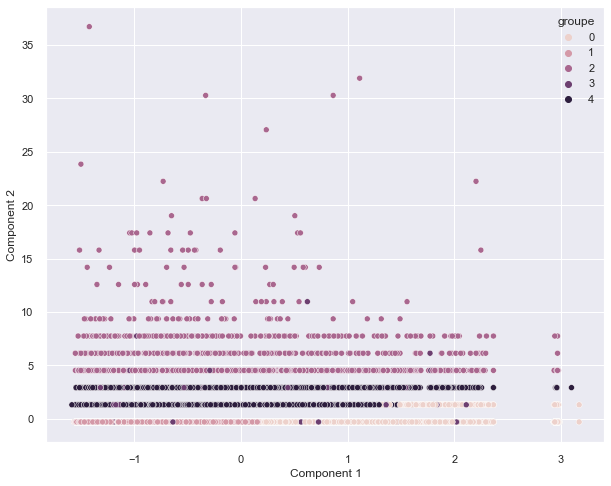

In [95]:
plt.figure(figsize=(10,8))
sns.scatterplot(test['Component 1'], test['Component 2'], hue = test.groupe)

In [96]:
rfm = df_rfm[["Recency", "Frequence", "Montant"]]

### T-SNE

In [ ]:
from sklearn.manifold import TSNE
rfm_tsne = TSNE(n_components=3).fit_transform(rfm)
dftsne = pd.DataFrame(rfm_tsne)
dftsne['cluster'] = skillsPCA_labels
dftsne.columns = ['x1','x2','cluster']